In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from random import shuffle
from sklearn.datasets import make_spd_matrix

In [3]:
%matplotlib inline

In [4]:
from contour_visualization.Gaussian import Gaussian
from contour_visualization import picture_plot
from contour_visualization import color_schemes

contour_visualization.picture_contours - WARNING - No module named 'density_visualization'
No module named 'mb_modelbase'


In [5]:
size = 1000

plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'

dist_params = {
    "scatter_points": True,
    "scatter_points_num": int(800**0.5),
}

vis_params = {
    "marker": "o",
    "edge_colors": False,
    "face_colors": True,
    "alpha": 0.7,  # opacity
    "s":  3**2, # size
}

save_path  = os.path.abspath('/home/luca_ph/Documents/papers_aktuelle/eurovis2022-GMM/figures_new')

In [6]:
def get_colors(states, neighbors, colors):
    def promising(state, color):
        for neighbor in neighbors.get(state): 
            color_of_neighbor = colors_of_states.get(neighbor)
            if color_of_neighbor == color:
                return False

        return True

    def get_color_for_state(state, colors):
        shuffle(colors)
        for color in colors:
            if promising(state, color):
                return color
            
    colors_of_states = {}
    for state in states:
        colors_of_states[state] = get_color_for_state(state, colors)
    return colors_of_states

In [7]:
def create_neighbors(means, n_closest):
    neighbors = {}
    
    def pClosest(points, K):
        closest_points = sorted(enumerate(points), key = lambda K: K[1][0]**2 + K[1][1]**2)[1:K+1]
        return [i[0] for i in closest_points]
    
    for i, mean in enumerate(means):
        neighbors[i] = pClosest(means - mean, n_closest)
    return neighbors
        
        

In [8]:
def generate_coloring(means, colors, neighbors=5):
    states = list(range(len(means)))
    neighbors = create_neighbors(means, neighbors)
    return get_colors(states, neighbors, colors)

In [9]:
def generate_random_psd_matrix(matrix_size=2, size=1.0):
    return make_spd_matrix(matrix_size) * np.random.uniform(size/2, size)

In [10]:
def generate_random_mean(mean_size=2, size=1.0):
    return np.random.uniform(-size, size, mean_size)

In [11]:
def change_size(gmm, size=200):
    for gm in gmm:
        gm.size = size

In [12]:
def generate_gaussian(n_components):
    np.random.seed(0)
    matrix = generate_random_psd_matrix(2, 0.5)
    covariances_ = [matrix for i in range(n_components)]
    weights_ = np.random.dirichlet(np.ones(n_components)*1000,size=1)[0]
    # weights_ = [0.5 for i in range(n_components)]
    means_ =  [generate_random_mean(2, 15.0) for i in range(n_components)]
    covariances_ = [generate_random_psd_matrix(2, 3.0) for i in range(n_components)]
    colors = generate_coloring(means_, color_schemes.get_colorbrewer_schemes(), 4)
    gaussian_mixture = [Gaussian(weight=weights ,means=means , cov_matrix=covariances, size=200) for weights, means, covariances in zip(weights_, means_, covariances_)]
    return gaussian_mixture, colors

In [13]:
# load predefined GMM mixture
with open('../mixture_model_data/gmm_mixture.pickle', 'rb') as handle:
    gmm = pickle.load(handle)

In [14]:
# load proper colors for the predefined GMM
with open('../mixture_model_data/means_colors.pickle', 'rb') as handle:
    means_colors = pickle.load(handle)
    means_, colors = means_colors[0], means_colors[1]

In [15]:
def generate_random_gaussians(n_components=40):
    """probably doesn't really work """

    ## create random Gaussians
    #matrix = generate_random_psd_matrix(2, 0.5)
    #covariances_ = [matrix for i in range(n_components)]

    weights_ = np.random.dirichlet(np.ones(n_components)*1000,size=1)[0]

    # weights_ = [0.5 for i in range(n_components)]
    means_ =  [generate_random_mean(2, 15.0) for i in range(n_components)]
    covariances_ = [generate_random_psd_matrix(2, 3.0) for i in range(n_components)]

    gmm = [Gaussian(weight=weights ,means=means , cov_matrix=covariances, size=200) for weights, means, covariances in zip(weights_, means_, covariances_)]

    colors = generate_coloring(means_, color_schemes.get_colorbrewer_schemes(), 4)
    return gmm, colors

In [16]:
# set effective resolution of visualizations of gmm
change_size(gmm, 1000)

In [33]:
len(colors)

35

(-19.0, 18.0)

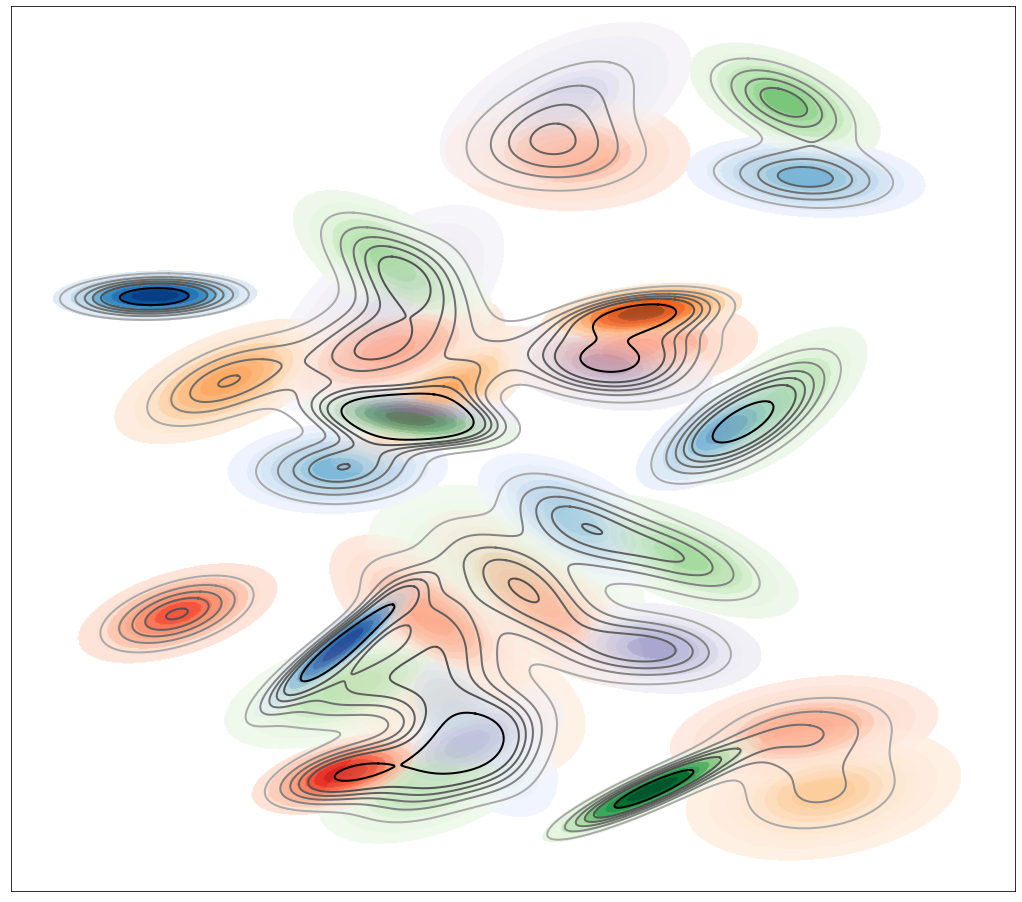

In [17]:
fig_contour, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, contour_colorscheme=list(colors.values()), contours=True, contour_lines=True)
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [18]:
fig_contour.savefig(os.path.join(save_path, f'35_components_contour.png'), format='png')
fig_contour.savefig(os.path.join(save_path, f'35_components_contour.pdf'), format='pdf')

(-19.0, 18.0)

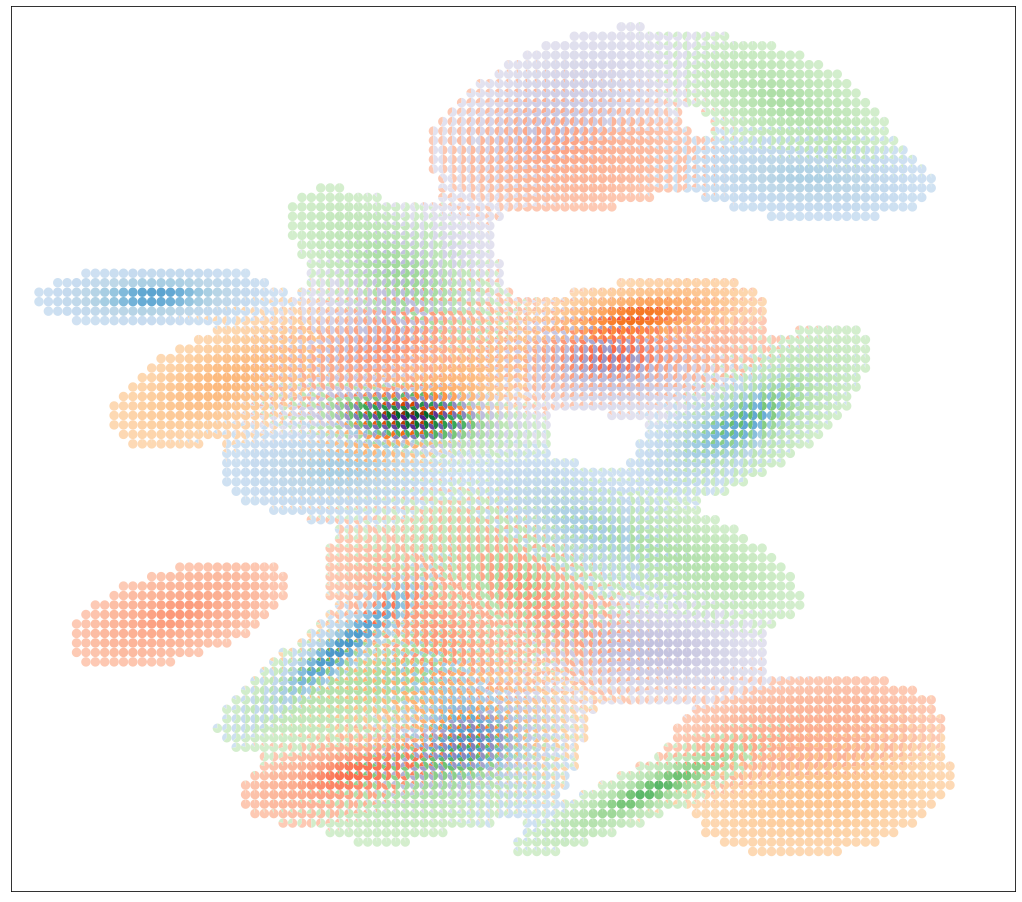

In [19]:
fig_pie, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, pie_chart_colors=list(colors.values()), pie_charts=True, pie_num = 120, pie_angle=90, pie_chart_iso_level=40, pie_chart_contour_method="equal_density", pie_chart_modus="light")
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [20]:
fig_pie.savefig(os.path.join(save_path, f'35_components_pie.png'), format='png')
fig_pie.savefig(os.path.join(save_path, f'35_components_pie.pdf'), format='pdf')

points in grid of z-coordinates too similar
points in grid of z-coordinates too similar


(-19.0, 18.0)

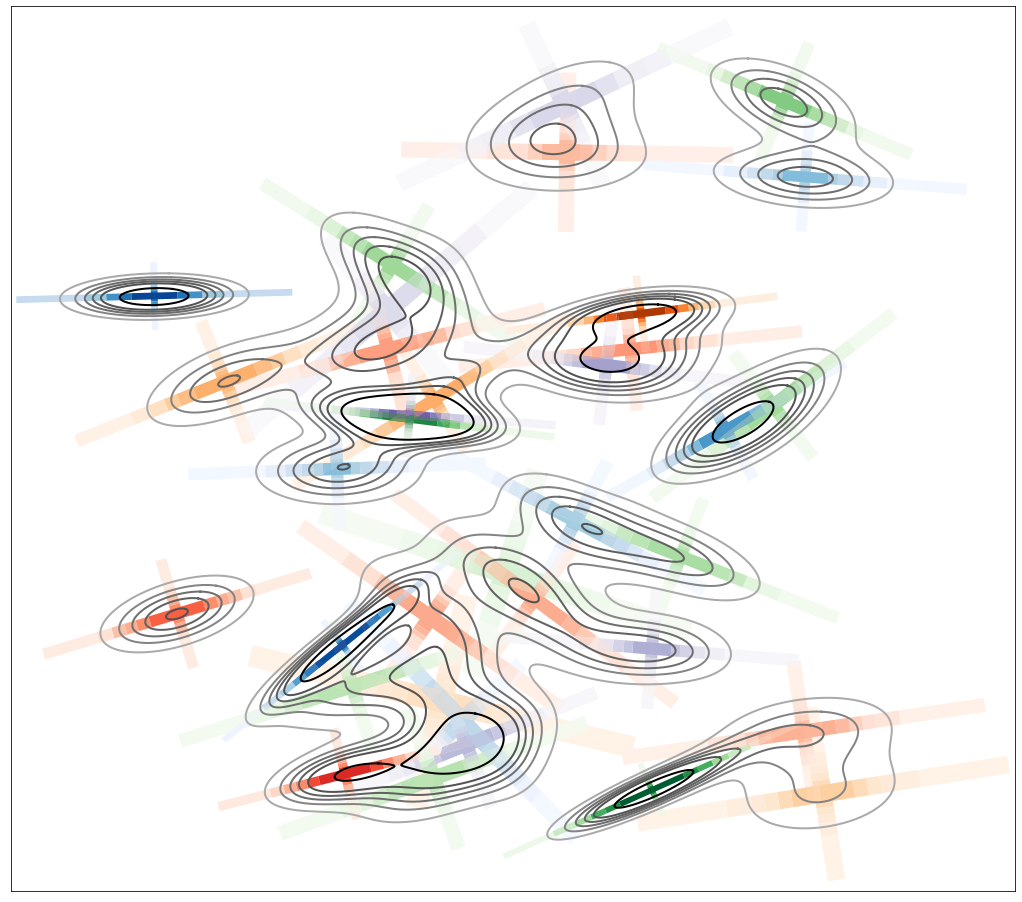

In [21]:
fig_crosses, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, cross_colorscheme=list(colors.values()), crosses=True, contour_lines=True)
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [22]:
fig_crosses.savefig(os.path.join(save_path, f'35_components_crosses.png'), format='png')
fig_crosses.savefig(os.path.join(save_path, f'35_components_crosses.pdf'), format='pdf')

(-19.0, 18.0)

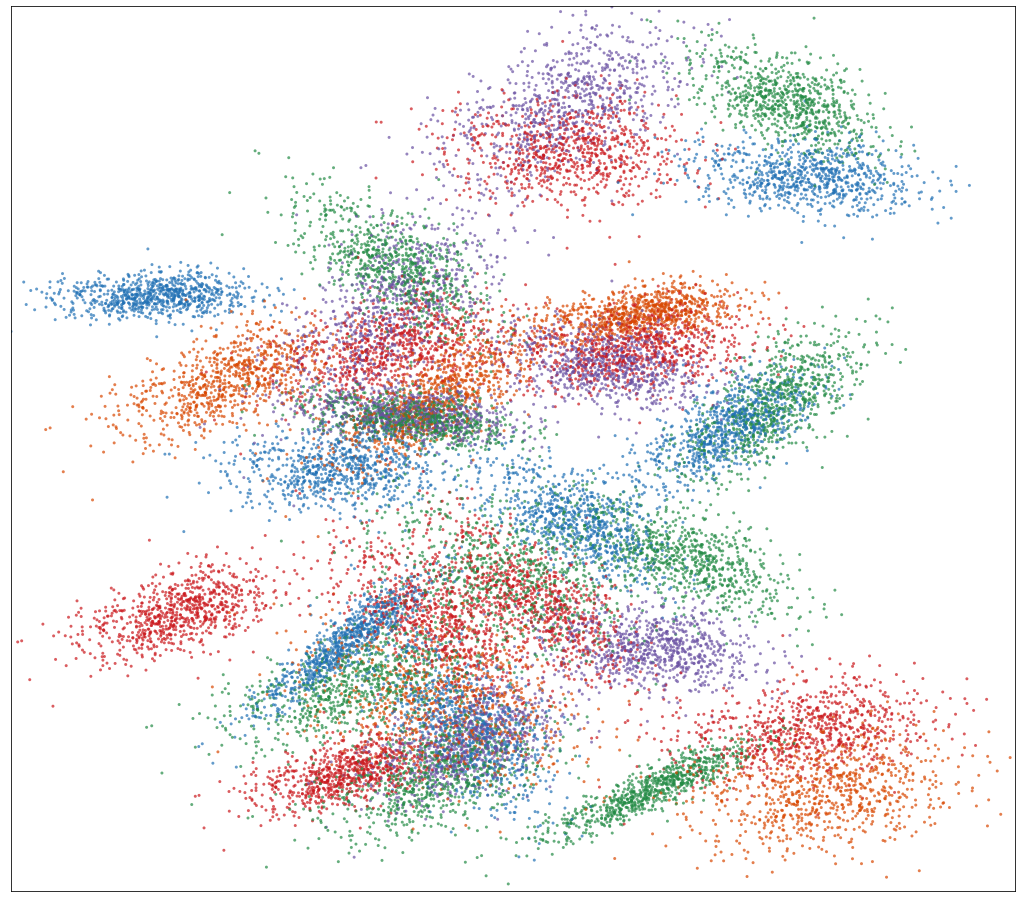

In [23]:
fig_sampling, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
picture_plot.plot_image(ax, gmm, schatter_points_colors=list(colors.values()), **dist_params, **vis_params)
ax.set_xlim((-20.5, 21.5))
ax.set_ylim((-19., 18.))

In [24]:
fig_sampling.savefig(os.path.join(save_path, f'35_components_sampling.png'), format='png')
fig_sampling.savefig(os.path.join(save_path, f'35_components_sampling.pdf'), format='pdf')

In [25]:
settings = [{"contours": True, "contour_lines": True},
            {"pie_charts": True, "pie_num": 120, "pie_angle": 90, "pie_chart_iso_level": 40, "pie_chart_contour_method": "equal_density", "pie_chart_modus": "light"},
            {"crosses": True, "contour_lines": True},
            {**dist_params, **vis_params}]

In [26]:
def plot_images(gmm, colors, settings, xlim=(-20., 20.), ylim=(-19.,19.)):
    figures = []
    axes = []
    for i in settings:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        picture_plot.plot_image(ax, gmm,
                                contour_colorscheme=list(colors.values()),
                                cross_colorscheme=list(colors.values()),
                                schatter_points_colors=list(colors.values()), **i)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        figures.append(fig)
        axes.append(ax)
        plt.show()
    return figures, axes

In [41]:
def save_images(figures, name, designs=None, **kwargs):
    if designs is None:
        designs = ["contour", "pie", "cross", "sampling"]
    print(kwargs)
    for fig, design in zip(figures, designs):
        print(f"{name}_{design}.png")
        fig.savefig(os.path.join(save_path, f"{name}_{design}.png"), format='png', **kwargs)
        fig.savefig(os.path.join(save_path, f"{name}_{design}.pdf"), format='pdf', **kwargs)

[{'colorscheme': <function contour_visualization.color_schemes.create_color_brewer_colorscheme(colorscheme_name, levels, lvl_white=1)>,
  'colorscheme_name': 'purple'},
 {'colorscheme': <function contour_visualization.color_schemes.create_color_brewer_colorscheme(colorscheme_name, levels, lvl_white=1)>,
  'colorscheme_name': 'green'},
 {'colorscheme': <function contour_visualization.color_schemes.create_color_brewer_colorscheme(colorscheme_name, levels, lvl_white=1)>,
  'colorscheme_name': 'orange'},
 {'colorscheme': <function contour_visualization.color_schemes.create_color_brewer_colorscheme(colorscheme_name, levels, lvl_white=1)>,
  'colorscheme_name': 'blue'},
 {'colorscheme': <function contour_visualization.color_schemes.create_color_brewer_colorscheme(colorscheme_name, levels, lvl_white=1)>,
  'colorscheme_name': 'green'},
 {'colorscheme': <function contour_visualization.color_schemes.create_color_brewer_colorscheme(colorscheme_name, levels, lvl_white=1)>,
  'colorscheme_name': '

In [53]:
colorList = list(colors.values())
colormaps = {
    15: dict(zip(range(15),list(np.random.choice(colorList, 15)))),
    25: dict(zip(range(25),list(np.random.choice(colorList, 25)))),
    55: dict(zip(range(50),list(np.random.choice(colorList, 50)))),
}


# issue: the colors_15 seem not to work

as a remedy we just use a random subsampling of the 35 colors for the 35 component one.
try a few random choices until you find one that looks good.
For quick trying, reduce the size parameter and only plot the contours design.

In [ ]:
gmm_15, colors_15 = generate_gaussian(15)

In [ ]:
# select 15 random color maps
colors_15 = dict(zip(range(15),list(np.random.choice(colorList, 15))))
change_size(gmm_15, 1000)

In [ ]:
settings = [{"schatter_points_colors": list(colors_15.values()), **dist_params, **vis_params}]

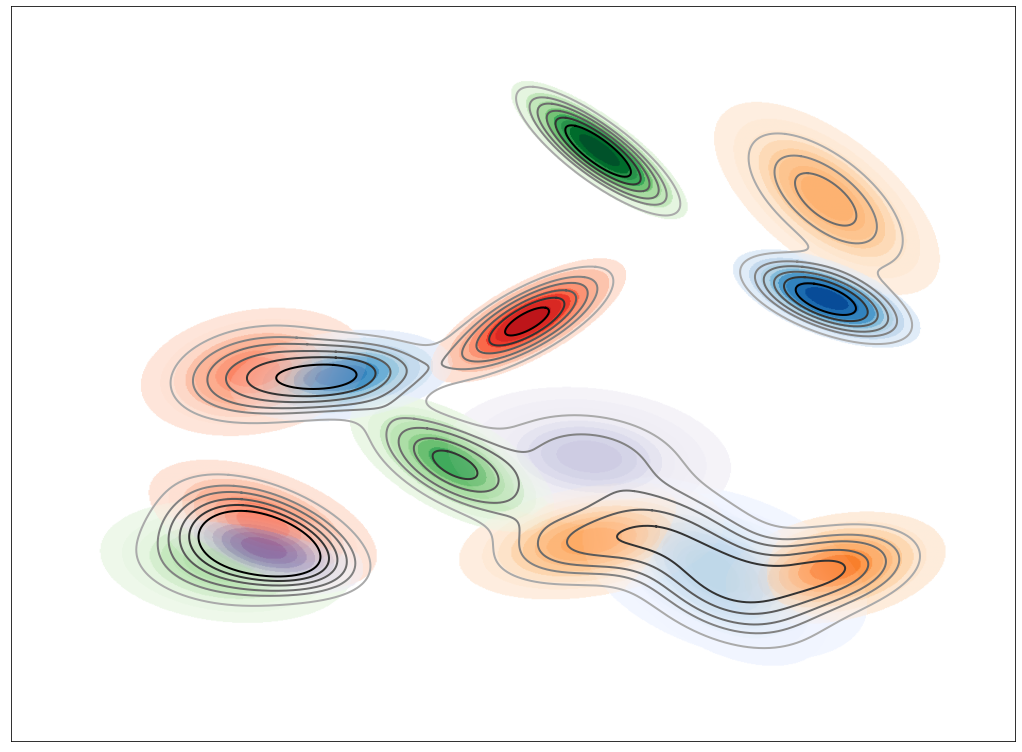

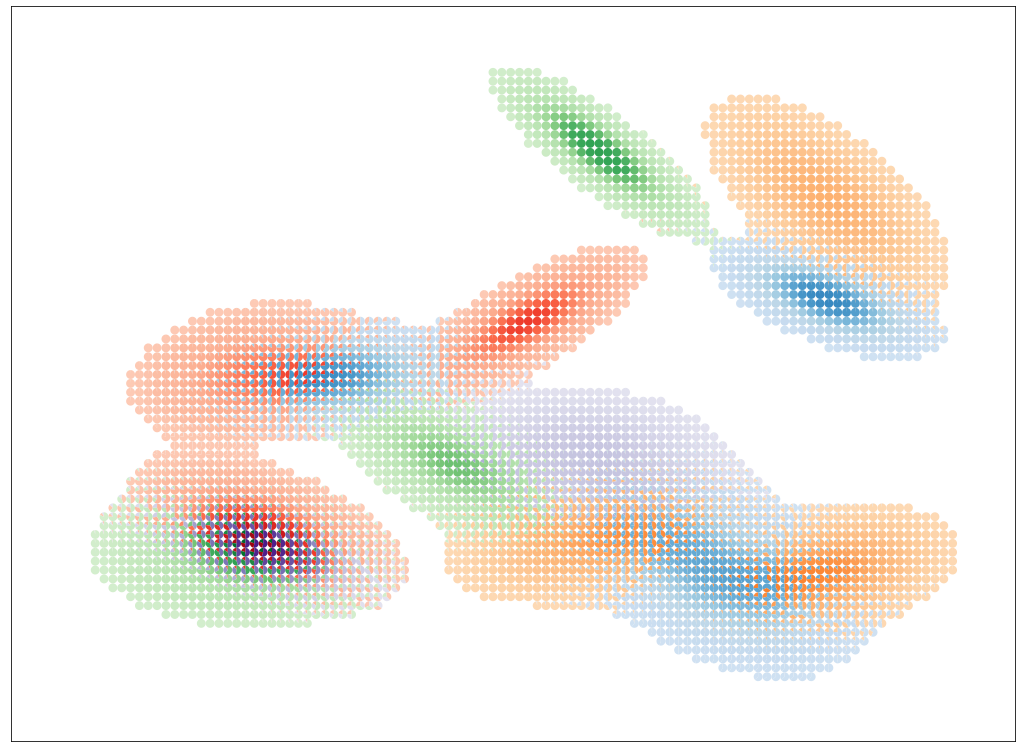

points in grid of z-coordinates too similar


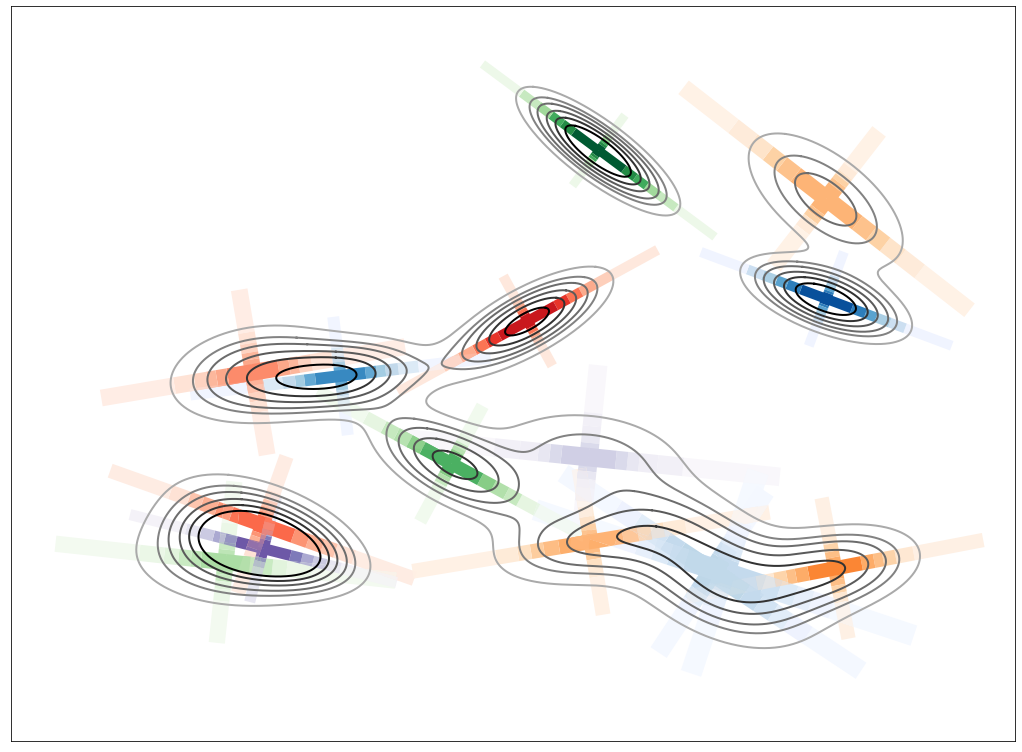

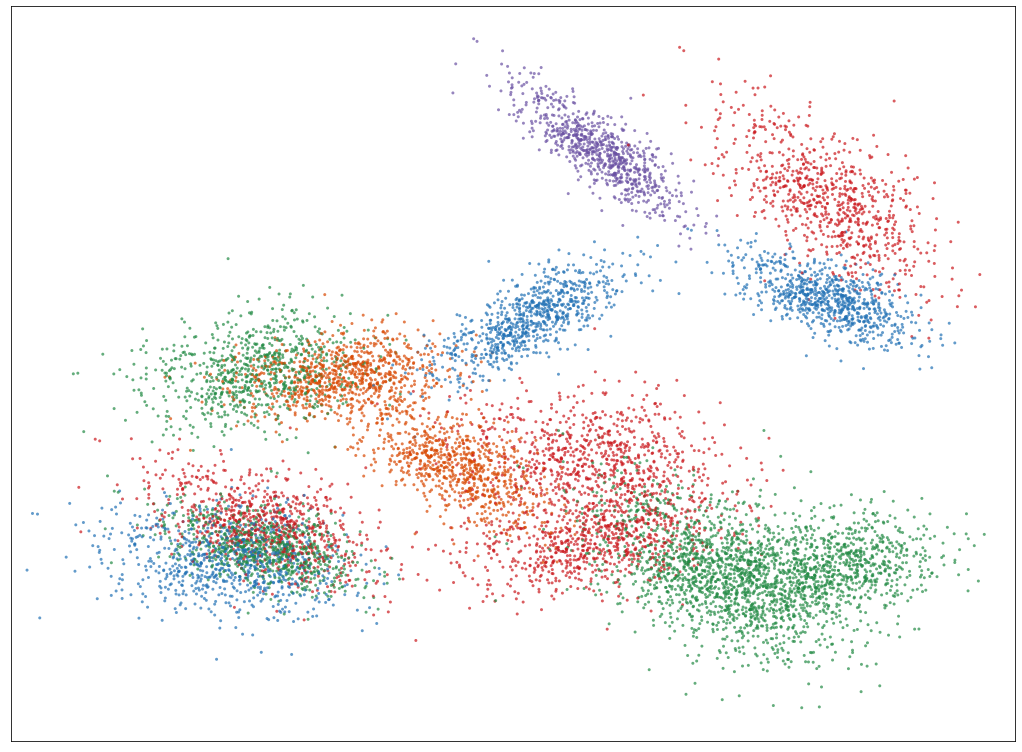

In [83]:
#n=len(list(colors.values()))
#figures_15 = plot_images(gmm_15, dict(zip(range(n),list(colors.values()))), settings, xlim=(-19., 22.), ylim=(-19., 11.))
figures_15 = plot_images(gmm_15, colors_15, settings, xlim=(-19., 22.), ylim=(-19., 11.))
#figures_15 = plot_images(gmm_15, colormaps[15], settings, xlim=(-19., 22.), ylim=(-19., 11.))

In [84]:
save_images(figures_15[0], "15_components")

{}
15_components_contour.png
15_components_pie.png
15_components_cross.png
15_components_sampling.png


## remaining plots: not needed for paper

In [ ]:
gmm_50, colors_50 = generate_gaussian(50)
change_size(gmm_50, size)

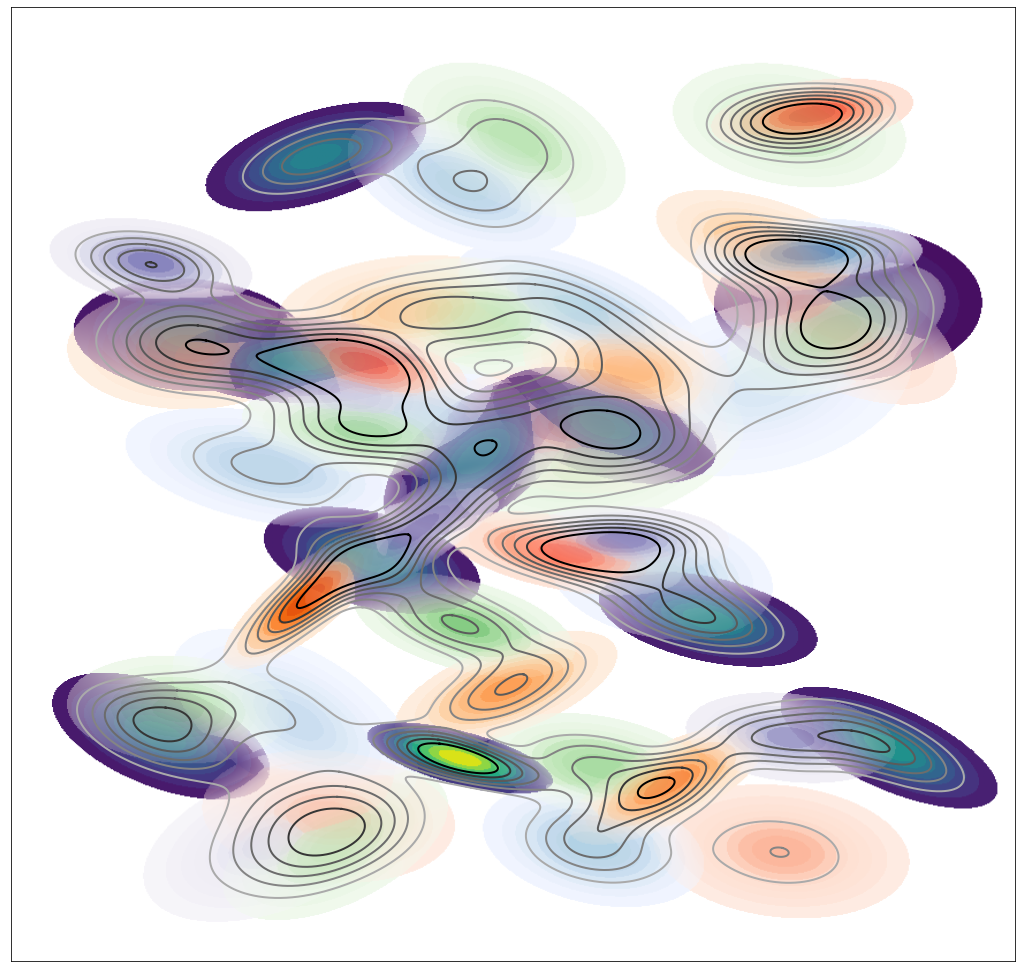

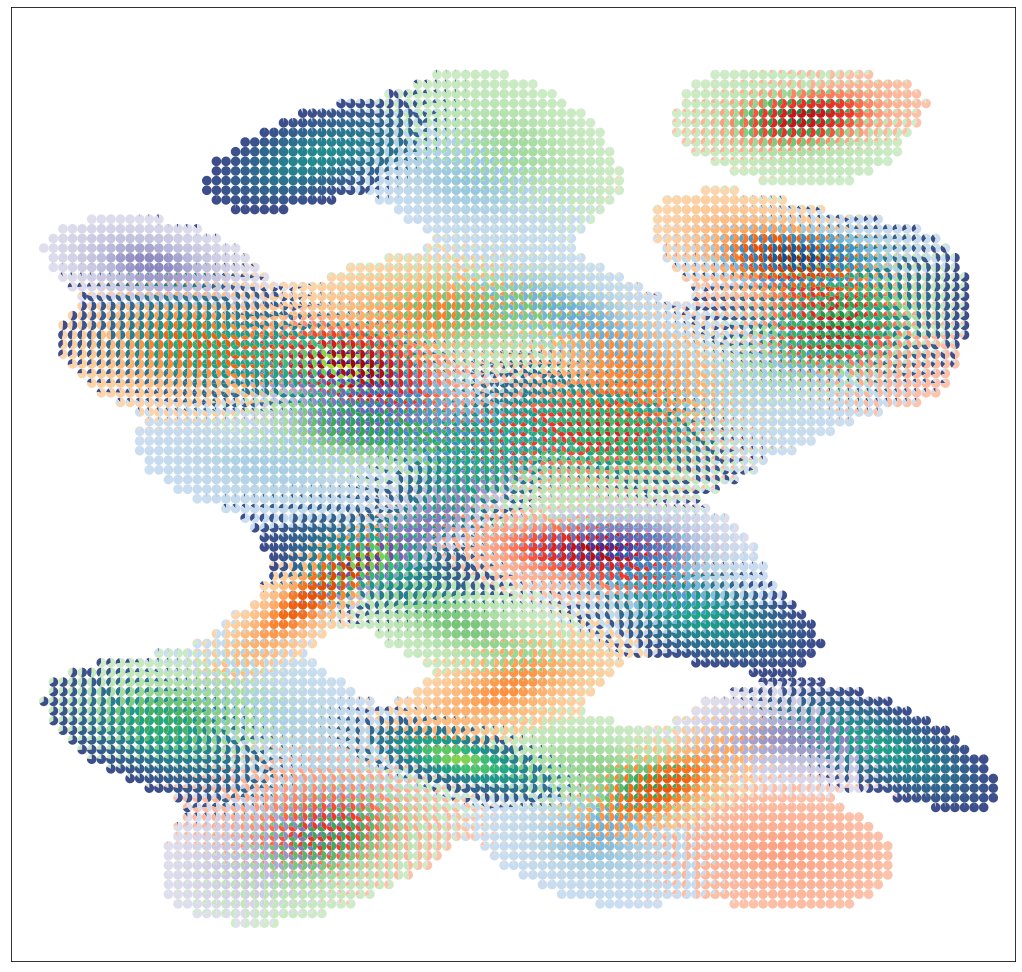

points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar
points in grid of z-coordinates too similar


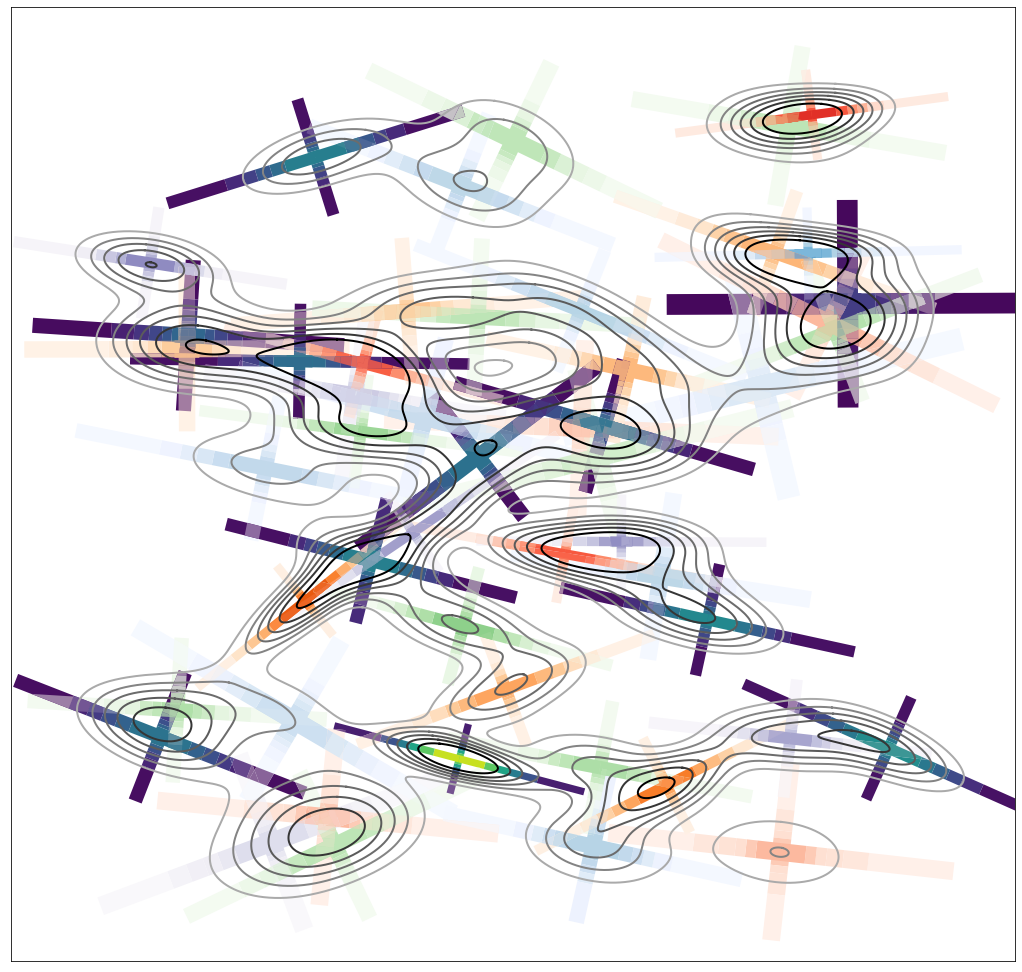

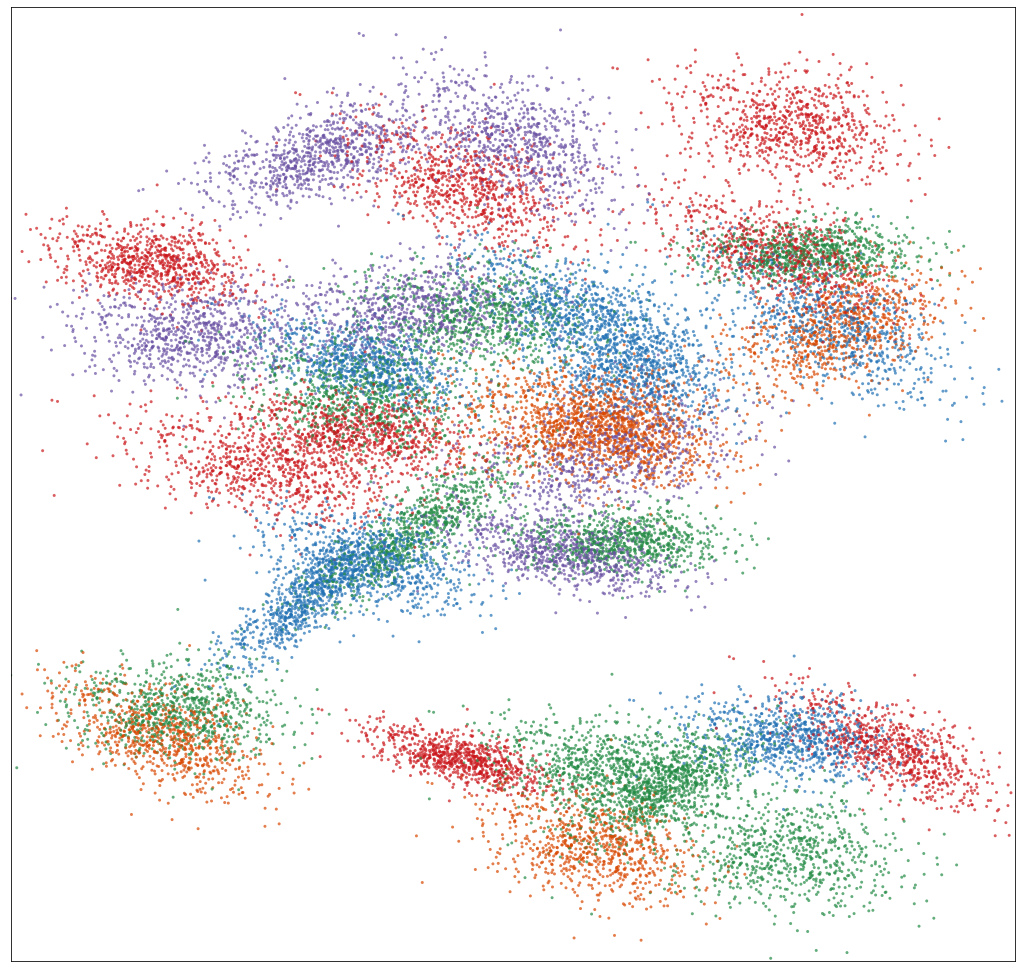

In [29]:
#figures_50 = plot_images(gmm_50, colors_50, settings)
figures_50 = plot_images(gmm_50, colormaps[50], settings)

In [30]:
save_images(figures_50[0], "50_components")

{}
50_components_contour.png


AttributeError: 'list' object has no attribute 'savefig'

In [ ]:
gmm_25, colors_25 = generate_gaussian(25)
change_size(gmm_25, size)

In [ ]:
figures_25 = plot_images(gmm_25, colors_25, settings)

In [ ]:
save_images(figures_25[0], "25_components")

In [ ]:
# fig_contour_50, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# picture_plot.plot_image(ax, gmm_50, contour_colorscheme=list(colors_50.values()), contours=True, contour_lines=True)

In [ ]:
# fig_pie, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# picture_plot.plot_image(ax, gmm, pie_chart_colors=list(colors.values()), pie_charts=True, pie_num = 120, pie_angle=90, pie_chart_iso_level=40, pie_chart_contour_method="equal_density", pie_chart_modus="light")

In [ ]:
# fig_contour_25, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
# # ax.xaxis.set_visible(False)
# # ax.yaxis.set_visible(False)
# picture_plot.plot_image(ax, gmm_25, contour_colorscheme=list(colors_25.values()), contours=True, contour_lines=True)

In [ ]:
# fig_contour_15, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
# picture_plot.plot_image(ax, gmm_15, contour_colorscheme=list(colors_15.values()), contours=True, contour_lines=True)